# Decision Tree Classification: Student Performance

## Setup and Library Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA

## Load Data & Visualizing 

In [5]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\student-mat.xls", sep=';')

In [7]:
df.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [11]:
numerical_features = [
    features for features in df.columns if df[features].dtype != 'O']


print(len(numerical_features))

16


In [13]:
df[numerical_features].head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


<Axes: >

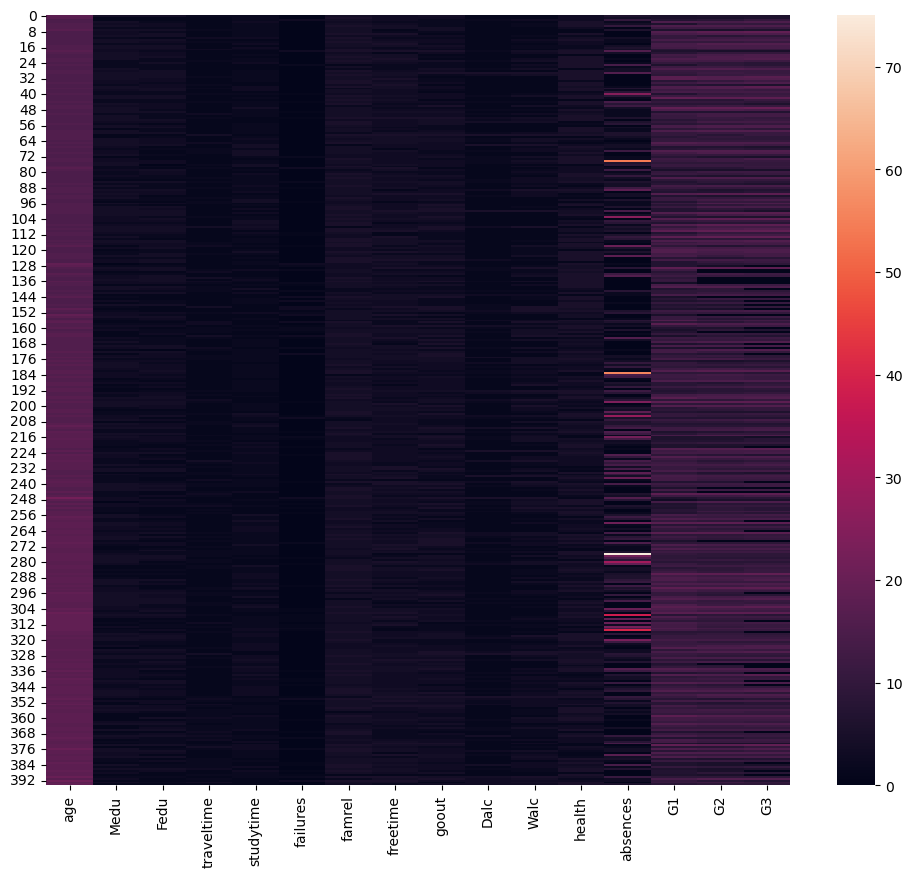

In [15]:
plt.figure(figsize=(12, 10)) 
sns.heatmap(df[numerical_features])

In [16]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<Axes: >

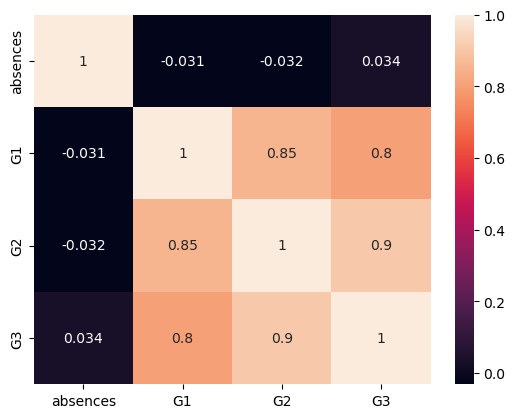

In [17]:
sns.heatmap(df[['absences', 'G1', 'G2', 'G3']].corr(), annot=True) # The near-zero correlations of absences tell it’s probably not a strong predictor of final performance.

## Create Features & The Target Variable

In [20]:
df['pass_fail'] = df['G3'].apply(lambda g: 'pass' if g <= 10 else 'fail')

In [22]:
X = df.drop(columns=['G3','pass_fail'])
y = df['pass_fail']

In [26]:
X.shape

(395, 32)

## One-Hot Encode Categoricals 

In [29]:
X = pd.get_dummies(
    X,
    columns=['school','sex','address','famsize','Pstatus',
             'Mjob','Fjob','reason','guardian',
             'schoolsup','famsup','paid','activities','nursery',
             'higher','internet','romantic'],
    drop_first=True
)

In [31]:
X.dtypes

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
school_MS             bool
sex_M                 bool
address_U             bool
famsize_LE3           bool
Pstatus_T             bool
Mjob_health           bool
Mjob_other            bool
Mjob_services         bool
Mjob_teacher          bool
Fjob_health           bool
Fjob_other            bool
Fjob_services         bool
Fjob_teacher          bool
reason_home           bool
reason_other          bool
reason_reputation     bool
guardian_mother       bool
guardian_other        bool
schoolsup_yes         bool
famsup_yes            bool
paid_yes              bool
activities_yes        bool
n

In [33]:
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


In [35]:
dupes = df.duplicated().sum()
print(f"Duplicate rows in full dataset: {dupes}")

Duplicate rows in full dataset: 0


## Train / Validation / Test Split

In [38]:
# First split: hold out 40% for the val and test set
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.40,        # 40% → temp(val, test)
    random_state=42,
    stratify=y             
)

# Second split: from the remaining 40%, 20% for each validation and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,        # 0.50 * 0.40 = 0.20 of each one
    random_state=42,
    stratify=y_temp        
)

In [40]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((237, 41), (237,), (79, 41), (79,), (79, 41), (79,))

## Decision Tree Model

In [43]:
clf = DecisionTreeClassifier(criterion='gini', random_state=47) #criterion can be entropy
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=47)

In [45]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fail       0.91      0.93      0.92        42
        pass       0.92      0.89      0.90        37

    accuracy                           0.91        79
   macro avg       0.91      0.91      0.91        79
weighted avg       0.91      0.91      0.91        79



In [47]:
# Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , clf.score(X_train, y_train))
print('----------------------------------------------------')
print('DecisionTreeClassifierModel Test Score is : ' , clf.score(X_test, y_test))
print('----------------------------------------------------')
print('DecisionTreeClassifierModel Classes are : ' , clf.classes_)

DecisionTreeClassifierModel Train Score is :  1.0
----------------------------------------------------
DecisionTreeClassifierModel Test Score is :  0.9113924050632911
----------------------------------------------------
DecisionTreeClassifierModel Classes are :  ['fail' 'pass']


In [49]:
# Feature importances
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)

# Show the top 10
print(feat_imp.sort_values(ascending=False).head(10))

G2              0.782516
famrel          0.048464
G1              0.035614
Walc            0.030558
goout           0.028050
internet_yes    0.024076
traveltime      0.020625
nursery_yes     0.014470
Mjob_teacher    0.011286
famsize_LE3     0.004341
dtype: float64


## Confusion Matrix 

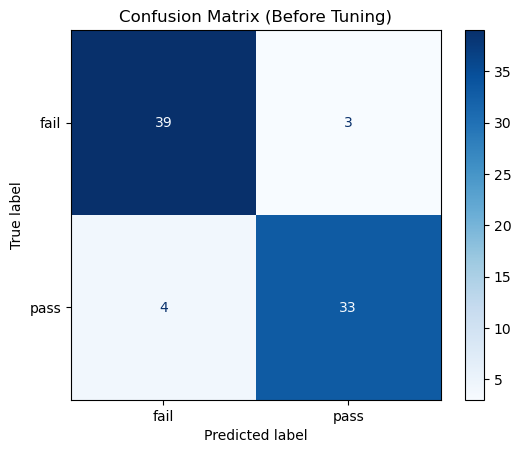

In [52]:
CM = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, display_labels=clf.classes_, cmap='Blues'
)

disp.ax_.set_title("Confusion Matrix (Before Tuning)")
plt.show()

## Visualize Decision Tree

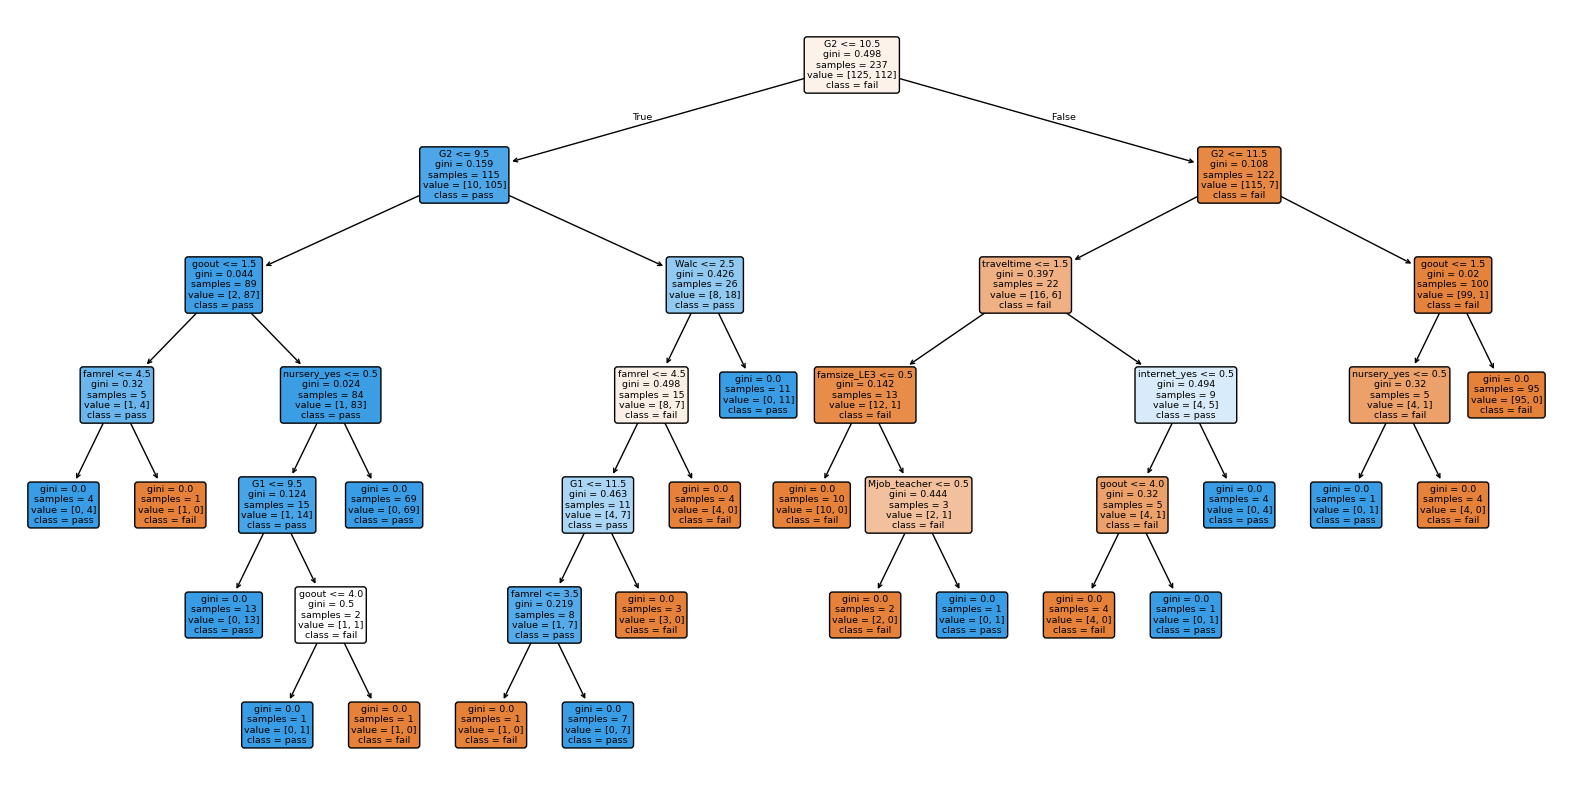

In [55]:
plt.figure(figsize=(20,10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    #max_depth=5     
)
plt.show()

## Avoiding Overfitting

In [57]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=12, random_state=47) #criterion can be entropy
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=12, random_state=47)

In [60]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fail       0.87      0.98      0.92        42
        pass       0.97      0.84      0.90        37

    accuracy                           0.91        79
   macro avg       0.92      0.91      0.91        79
weighted avg       0.92      0.91      0.91        79



# Avoiding Overfitting Using Hyperparameter Tuning: GridSearchCV

In [63]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30], 
    'min_samples_leaf': [1, 2, 5, 10, 20, 30, 40],
    'criterion': ['gini', 'entropy'],  
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

# Evaluate best estimator on the validation set
best_clf = grid.best_estimator_
print("Validation score (tuned):", best_clf.score(X_val, y_val))

Best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20}
Best CV score: 0.9281028368794326
Validation score (tuned): 0.9367088607594937


In [64]:
y_pred = best_clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.9493670886075949


In [65]:
#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , clf.score(X_train, y_train))
print('----------------------------------------------------')
print('DecisionTreeClassifierModel validation Score is : ' , clf.score(X_val, y_val))
print('----------------------------------------------------')
print('DecisionTreeClassifierModel Classes are : ' , clf.classes_)

DecisionTreeClassifierModel Train Score is :  0.9282700421940928
----------------------------------------------------
DecisionTreeClassifierModel validation Score is :  0.9113924050632911
----------------------------------------------------
DecisionTreeClassifierModel Classes are :  ['fail' 'pass']


In [66]:
#Calculating Prediction
y_pred = clf.predict(X_val)
y_pred_prob = clf.predict_proba(X_val)
print('Acutal value give to the model:', y_val[:10].tolist())
print('Predicted Value from the model: ' , y_pred[:10].tolist())

Acutal value give to the model: ['fail', 'fail', 'fail', 'pass', 'fail', 'fail', 'fail', 'fail', 'fail', 'pass']
Predicted Value from the model:  ['fail', 'fail', 'fail', 'pass', 'fail', 'fail', 'fail', 'fail', 'fail', 'pass']


In [67]:
# Feature importances
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)

# Show the top 10
print(feat_imp.sort_values(ascending=False).head(10))

G2                 0.975514
guardian_mother    0.017393
absences           0.003367
famrel             0.002178
G1                 0.001548
age                0.000000
Medu               0.000000
traveltime         0.000000
Fedu               0.000000
goout              0.000000
dtype: float64


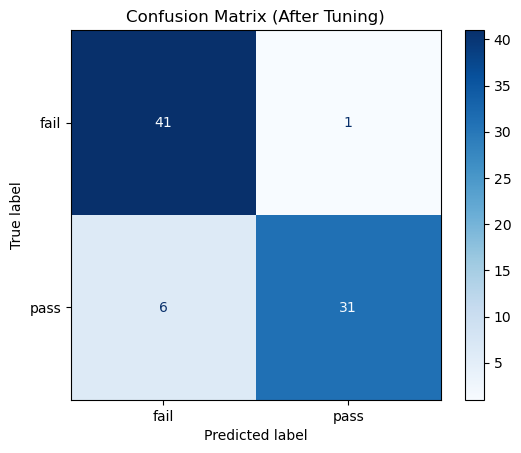

In [68]:
CM = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, display_labels=clf.classes_, cmap='Blues'
)
disp.ax_.set_title("Confusion Matrix (After Tuning)")
plt.show()

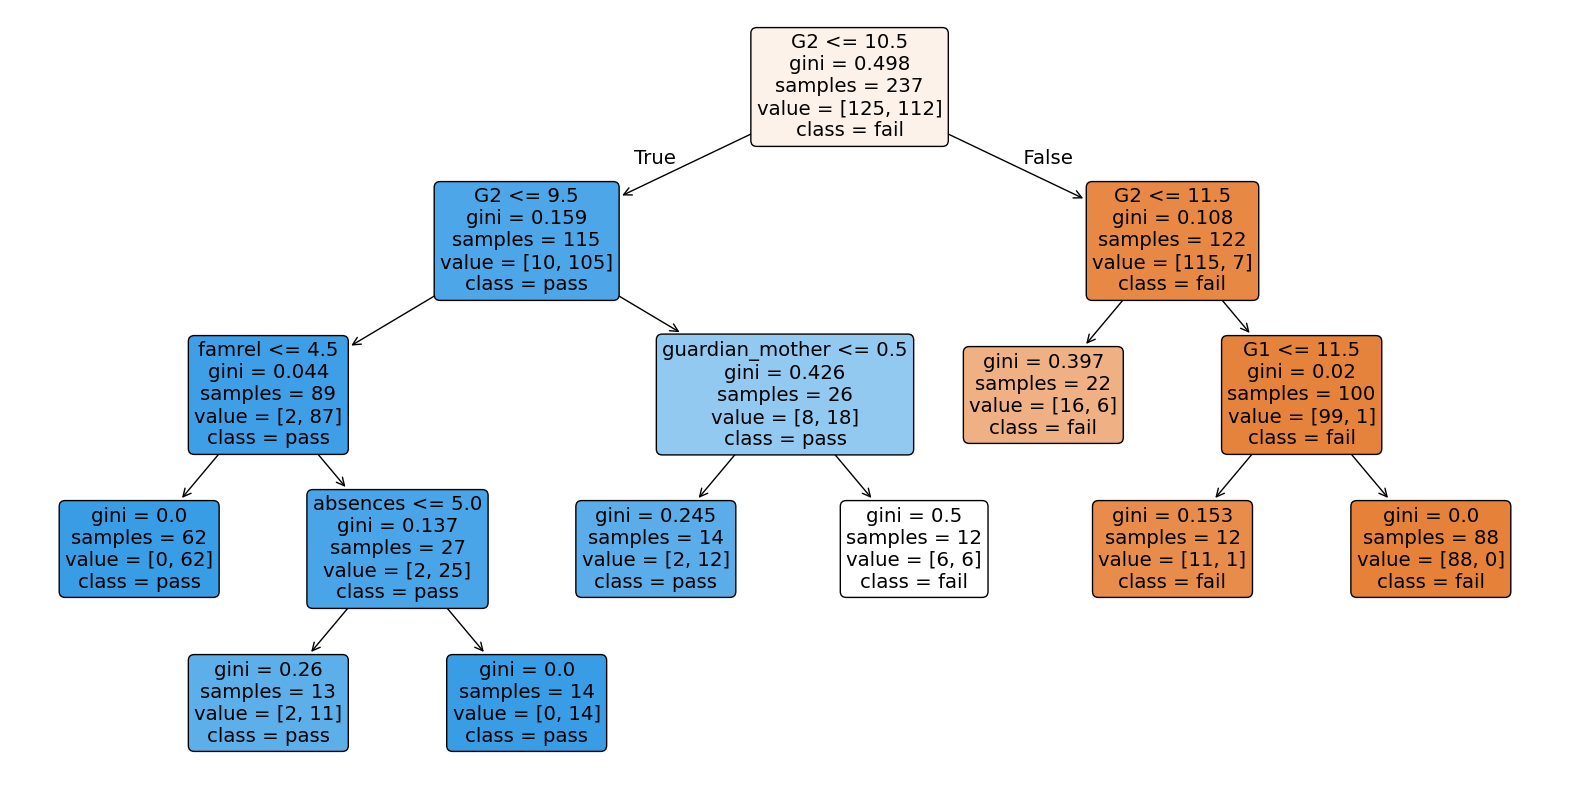

In [75]:
plt.figure(figsize=(20,10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    # max_depth=5      # just to avoid a gargantuan plot
)
plt.show()

# K-Nearest Neighbors(KNN)

### Feature Scaling

In [79]:
# scale on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

### K-Nearest Neighbors Model

In [82]:
# Train with k=5 (as a starting point)
knn = KNeighborsClassifier(n_neighbors=5)    # KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=3, p=2, weights='uniform')
knn.fit(X_train_scaled, y_train) # Means storing the provided feature matrix (X_train_scaled) and labels (y_train), no training happens yet.

KNeighborsClassifier()

In [84]:
# Predict will compute distances, find the 5 nearest neighbors, and let them “vote” on the class.
y_test_pred = knn.predict(X_test_scaled) 
print('Predicted Value from the model:', y_test_pred[:10].tolist())
print("-"*50)
print('Acutal value give to the model:', y_test[:10].tolist())

#print("accuracy:", accuracy_score(y_test, y_test_pred)) # accuracy_score = number of correct predictions / total number of samples

Predicted Value from the model: ['fail', 'pass', 'pass', 'pass', 'pass', 'fail', 'pass', 'pass', 'pass', 'fail']
--------------------------------------------------
Acutal value give to the model: ['fail', 'pass', 'pass', 'pass', 'pass', 'fail', 'pass', 'fail', 'fail', 'fail']


In [86]:
# report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        fail       0.82      0.76      0.79        42
        pass       0.75      0.81      0.78        37

    accuracy                           0.78        79
   macro avg       0.79      0.79      0.78        79
weighted avg       0.79      0.78      0.79        79



### Confusion Matrix

<Figure size 600x600 with 0 Axes>

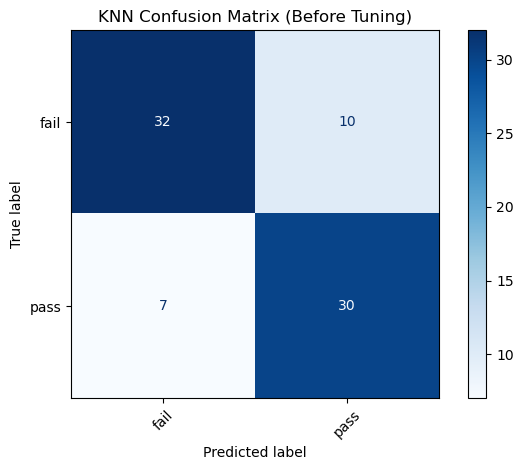

In [89]:
cm = confusion_matrix(y_test, y_test_pred, labels=knn.classes_)

# 2. Create a display object
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=knn.classes_
)

# 3. Plot it
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("KNN Confusion Matrix (Before Tuning)")
plt.tight_layout()
plt.show()

# Avoiding Overfitting

### KNN Using Hyperparameter Tuning: GridSearchCV

In [107]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3,5,7,9,11,13,15,17,19,21],
    'weights':      ['uniform', 'distance'],
    'p':            [1, 2]
}

# GridSearchCV with 5-fold CV
knn_gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1        
)

In [109]:
# Fit on the training data
knn_gs.fit(X_train_scaled, y_train)

# Inspect the best parameters and score
print("Best params (GridSearchCV):", knn_gs.best_params_)
print("-"*50)
print("Best CV score:         ", knn_gs.best_score_)

Best params (GridSearchCV): {'n_neighbors': 21, 'p': 1, 'weights': 'distance'}
--------------------------------------------------
Best CV score:          0.8356382978723405


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan 0.72189716 0.68856383 0.68856383        nan 0.73874113
 0.72641844 0.72641844        nan 0.74264184 0.75966312 0.75124113
        nan 0.76382979 0.76374113 0.75531915        nan 0.78031915
 0.7679078  0.75939716        nan 0.78909574 0.7679078  0.76365248
        nan 0.80212766 0.78058511 0.78058511        nan 0.81046099
 0.7893617  0.78510638        nan 0.81046099 0.7766844  0.78501773
        nan 0.8356383  0.79361702 0.79352837]
  warnings.warn(


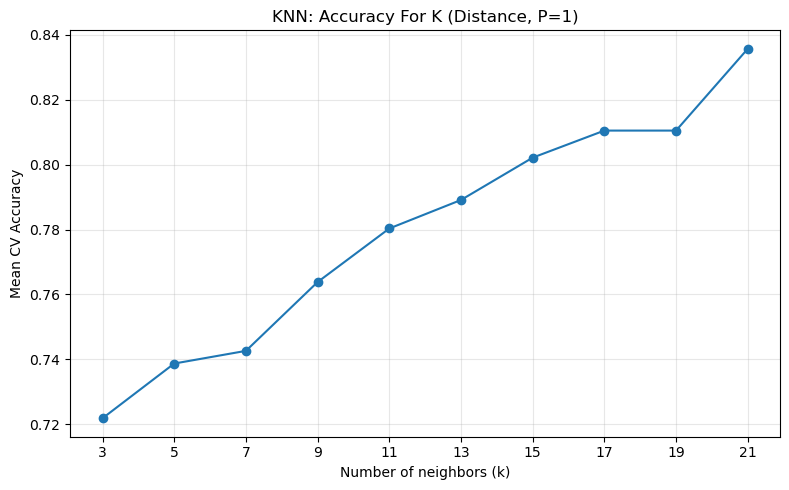

In [157]:
# Load results into a DataFrame
results = pd.DataFrame(knn_gs.cv_results_)

# Filter for the combination you care about (e.g. weights='distance', p=1)
mask = (results['param_weights'] == 'distance') & (results['param_p'] == 1)
slice_df = results[mask].sort_values('param_n_neighbors')

# Grab neighbors and mean scores
ks     = slice_df['param_n_neighbors'].astype(int).tolist()
scores = slice_df['mean_test_score'].tolist()

# Plot
plt.figure(figsize=(8,5))
plt.plot(ks, scores, marker='o', linestyle='-')
plt.xticks(ks)
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Mean CV Accuracy")
plt.title("KNN: Accuracy For K (Distance, P=1)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [159]:
y_val_pred = knn_gs.best_estimator_.predict(X_val_scaled)
print("Eval accuracy:", accuracy_score(y_val, y_val_pred))

Eval accuracy: 0.7848101265822784


In [161]:
y_test_pred = knn_gs.predict(X_test_scaled)

In [165]:
print("Test accuracy:", accuracy_score(y_test, y_test_pred))

Test accuracy: 0.810126582278481


In [167]:
# the report
print(classification_report(y_test, y_test_pred, digits=4))

              precision    recall  f1-score   support

        fail     0.8000    0.8571    0.8276        42
        pass     0.8235    0.7568    0.7887        37

    accuracy                         0.8101        79
   macro avg     0.8118    0.8069    0.8082        79
weighted avg     0.8110    0.8101    0.8094        79



### Confusion Matrix

<Figure size 600x600 with 0 Axes>

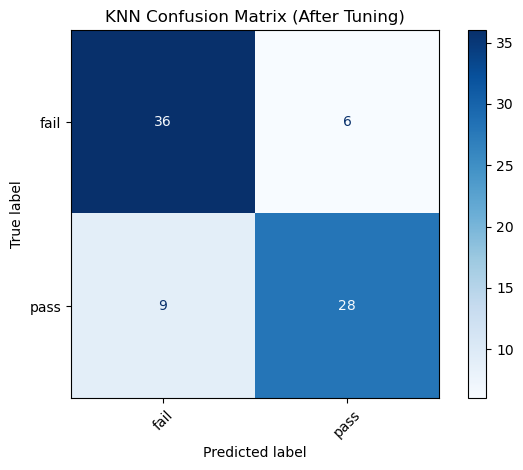

In [170]:
cm = confusion_matrix(y_test, y_test_pred, labels=knn.classes_)


disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=knn.classes_
)


plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("KNN Confusion Matrix (After Tuning)")
plt.tight_layout()
plt.show()

# Support Vector Machine

### Support Vector Machine Model

In [172]:
svm = SVC(random_state=42)

# Train data
svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [174]:
y_test_pred = svm.predict(X_test_scaled)


print("accuracy:", accuracy_score(y_test, y_test_pred))

accuracy: 0.8987341772151899


In [176]:
print('Predicted Value from the model:', y_test_pred[:10].tolist())
print("-"*50)
print('Acutal value give to the model:', y_test[:10].tolist())

Predicted Value from the model: ['fail', 'pass', 'pass', 'pass', 'pass', 'fail', 'pass', 'fail', 'fail', 'fail']
--------------------------------------------------
Acutal value give to the model: ['fail', 'pass', 'pass', 'pass', 'pass', 'fail', 'pass', 'fail', 'fail', 'fail']


In [178]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        fail       0.90      0.90      0.90        42
        pass       0.89      0.89      0.89        37

    accuracy                           0.90        79
   macro avg       0.90      0.90      0.90        79
weighted avg       0.90      0.90      0.90        79



# Confusion matrix

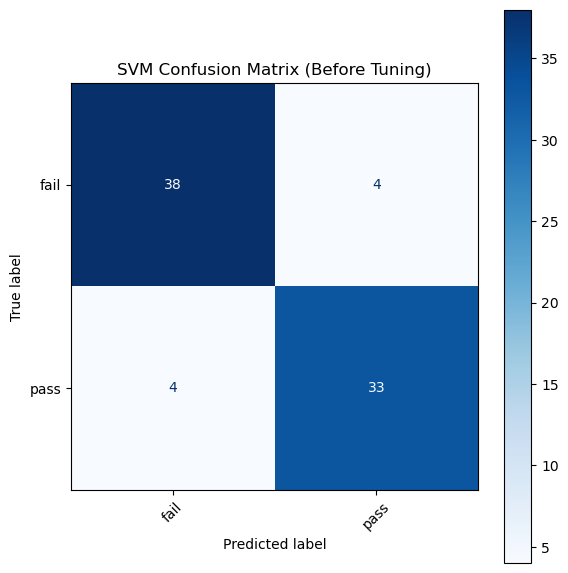

In [185]:
cm = confusion_matrix(y_test, y_test_pred, labels=svm.classes_)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=svm.classes_
)

# 3. Plot it
plt.figure(figsize=(6, 6))
disp.plot(
    cmap='Blues',
    xticks_rotation=45,
    values_format='d',
    ax=plt.gca()
)
plt.title("SVM Confusion Matrix (Before Tuning)")
plt.tight_layout()
plt.show()

# Avoiding Overfitting

### SVM Using Hyperparameter Tuning: GridSearchCV

In [187]:
param_grid = {
    'C':      [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma':  ['scale', 'auto']  
}

grid = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy: {:.4f}".format(grid.best_score_))

Best params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV accuracy: 0.9029


In [207]:
# validation set evaluation
y_val_pred = best_svm.predict(X_val_scaled)
print("Test accuracy:", accuracy_score(y_val, y_val_pred))

Test accuracy: 0.9240506329113924


In [209]:
# Test set evaluation
y_test_pred = best_svm.predict(X_test_scaled)
print("Test accuracy:", accuracy_score(y_test, y_test_pred))

Test accuracy: 0.9240506329113924


In [211]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        fail       0.95      0.90      0.93        42
        pass       0.90      0.95      0.92        37

    accuracy                           0.92        79
   macro avg       0.92      0.93      0.92        79
weighted avg       0.93      0.92      0.92        79



# Confusion matrix

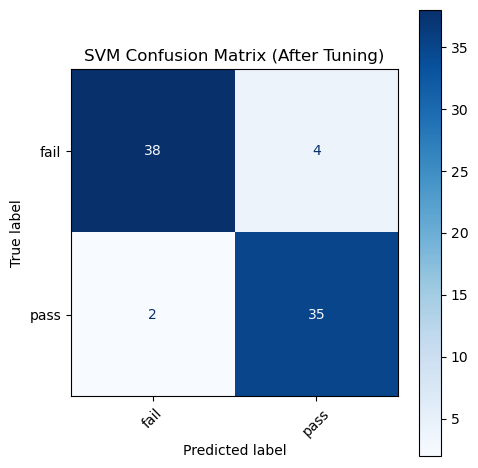

In [214]:
# Confusion matrix on test
cm = confusion_matrix(y_test, y_test_pred, labels=best_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=best_svm.classes_)
plt.figure(figsize=(5,5))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d', ax=plt.gca())
plt.title("SVM Confusion Matrix (After Tuning)")
plt.tight_layout()
plt.show()

### Visualize SVM

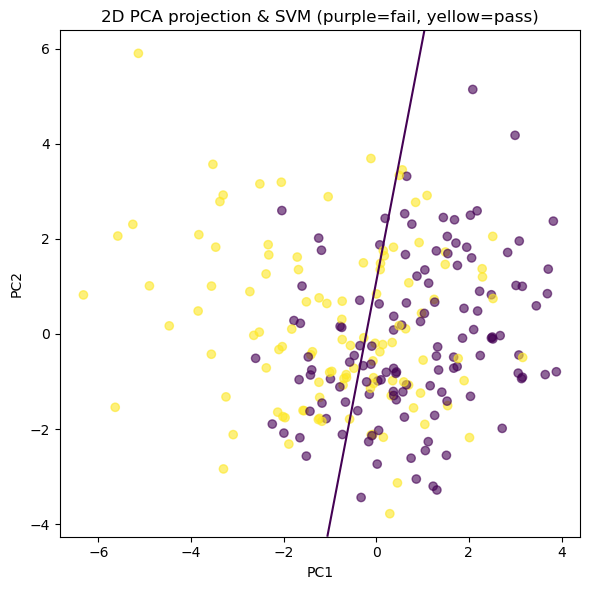

In [221]:
# Project train data to 2D
pca = PCA(n_components=2)
X2d = pca.fit_transform(X_train_scaled)
y2d = (y_train == 'pass').astype(int)

# Fit a linear SVM on those 2 principal components
svm2d = SVC(kernel='linear').fit(X2d, y2d)

# Plot points
plt.figure(figsize=(6,6))
plt.scatter(X2d[:,0], X2d[:,1], c=y2d, alpha=0.6)

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(*xlim, 200)
yy = np.linspace(*ylim, 200)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm2d.decision_function(xy).reshape(XX.shape)

# Draw contour
ax.contour(XX, YY, Z, levels=[0], linestyles=['-'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA projection & SVM (purple=fail, yellow=pass)")
plt.tight_layout()
plt.show()